Given this set of data in regards to students grades and other life circumstances and activities we want to know how these things will affect one another.  Specifically, students who drink regularly, have divorced parents or working mothers are set up to have less supervision and less diligent in their studies, and an expected drop in grades is expected.  

Conversly a desire for continued education past secondary school and an above average amount of time spent studying should correlate to stronger academic performance.

In [82]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
#df = pd.read_csv("C:\\Users\\Peter\\Desktop\\Prep Captstone\\StudentAlcohol\\student-por.csv", low_memory = False) 
df = pd.read_csv("C:\\Users\\Peter\\Desktop\\Prep Captstone\\StudentAlcohol\\student-mat.csv", low_memory = False) 

In [83]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [84]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [85]:
df.isnull().values.any()  #check for missing data

False

In [86]:
def checksignificance (type1, type2):  #takes 2 dataframes
    print("Difference of the means of the two datasets")
    #creates an array of items who have columns in the Dataframe we want to check correlation for 
    parameters = ['Medu', 'Fedu', 'Dalc', 'Walc', 'absences', 'freetime', 'famrel', 'failures','goout','studytime', 'traveltime', 'G1', 'G2', 'G3']
    
    for item in parameters:
        diff = type1[item].mean()- type2[item].mean()  #finds the difference between the two input dataframes for individual parameters in the array  
        if diff < -1 or diff > 1:                     #if the difference is greater than 1
            print(item, diff, '<--- SIGNIFICANT')    #print significant in all caps to get attention
        elif diff < -0.5 or diff > 0.5:             #if the difference is greater than .5
            print(item, diff, '<--- potentially significant')   #print 'potentially significant' next to results
        else:
            print(item, diff)                       #for small differences just print the results

In [87]:
def sampleandtest(set1, set2):
    findsmall=[len(set1), len(set2)]
    smaller=min(findsmall)
    x = 5
    print("Taking a sample to make the two data sets match in size", x, "times")
    for i in range(x): 
        if smaller == len(set1):
            randomsample = set2.sample(smaller)
            randomsample.name = set2.name+" sample"
            checkp(randomsample,set1)
        else:
            randomsample = set1.sample(smaller)
            randomsample.name = set1.name+" sample"    
            checkp(randomsample,set2)

In [88]:
def checkp (type1, type2):
    
    if len(type1)/len(type2) >= 1.3:  #check to see if the number of elements in the datasets is dissimilar in size
        similar = False
    elif len(type1)/len(type2) <= 0.75: #check to see if the number of elements in the datasets is dissimilar in size
        similar = False
    else:  #if they aren't vastly different in size they are obviously similar in size
        similar = True

    
    #parameters = ['Medu', 'Fedu', 'Dalc', 'Walc', 'absences', 'freetime', 'famrel', 'failures','goout','studytime', 'traveltime', 'G1', 'G2', 'G3']
    parameters = ['G3']
    if(similar == True):
        print('Datasets are of similar sizes (',type1.name, len(type1), 'and ',type2.name, len(type2), ') we\'ll run a STANDARD tstatistic and pvalue test')
    
    else:
        print('Datasets are of different sizes (',type1.name, len(type1), 'and ',type2.name, len(type2), ')  we\'ll run a MAN WHITNEY statistic and pvalue test')
    
    for item in parameters:
        if similar == True:  #if data sets are similar in size run standard Tstatistic and pvalue test
            ptest = ttest_ind(type1[item], type2[item], equal_var=False).pvalue
        else:  #if data sets are similar in size run man whitney statistic and pvalue test
            ptest = scipy.stats.mannwhitneyu(type1[item], type2[item]).pvalue
        #if ptest > 0.05:
        print(item, ttest_ind(type1[item], type2[item], equal_var=False))
            
            #man whitney function

In [89]:
def histvsdata(set1,set1title, set2,set2title, plottitle,plotdata):
    plt.figure(figsize=(5,10))
    plt.subplot(2, 1, 1)
    plt.hist(set1[plotdata], label = set1title, alpha = 0.5, normed = True)
    plt.axvline(set1[plotdata].mean(), color='b', linestyle='solid', linewidth=2)
    plt.title(plottitle)
    plt.hist(set2[plotdata], label = set2title, alpha = 0.5, normed = True)
    plt.axvline(set2[plotdata].mean(), color='g', linestyle='solid', linewidth=2)
    plt.legend(loc='upper left')
    plt.show()

Lets start with a heatmap to see what correlations we might see.

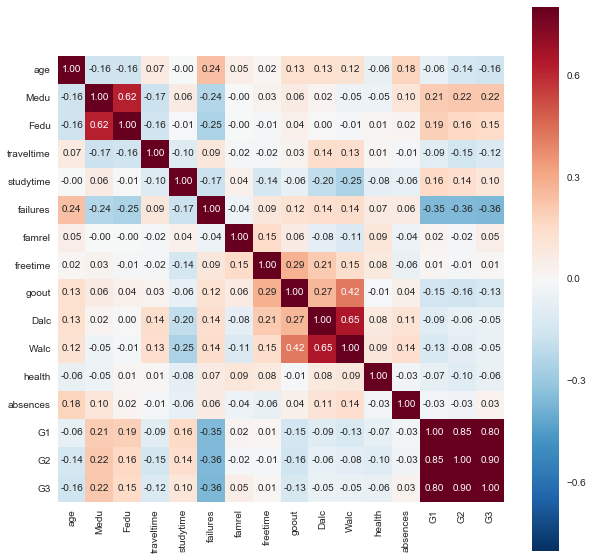

In [90]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

Unforetunetly there are no obvious answers that we can get our of the data as the only strong correlations using the surveys where stundents gave answers between 1 and 5 for various questions relate to parental education and week drinking compared to weekend drinking.  So to get answers we will have to look at the questions that weren't ranked 1-5.  The lack of information we are getting out of the survey scale questions could be a result of students not ranking the categories honestly or not really knowing how to compare themselves to other people.

Let's start with where students live.  Families in rural and families in urban life often have a different living dynamic and it could possibly affect the studies of students.

In [91]:
urban = df[df['address']=='U'] #create a filtered df with only information on students who live in urban areas
urban.name = 'Urban'
rural = df[df['address']=='R'] #create a filtered df with only information on students who live in rural areas
rural.name = 'Rural'

In [94]:
checkp(urban,rural)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Datasets are of different sizes ( Urban 307 and  Rural 88 )  we'll run a MAN WHITNEY statistic and pvalue test
G3 Ttest_indResult(statistic=2.1101367617785494, pvalue=0.036613811456642859)


In [95]:
sampleandtest(urban, rural) #take a sample of the larger set and run tstatistic and pvalue tests on sample and smaller set

Taking a sample to make the two data sets match in size 5 times
Datasets are of similar sizes ( Urban sample 88 and  Rural 88 ) we'll run a STANDARD tstatistic and pvalue test
G3 Ttest_indResult(statistic=2.1437292494227735, pvalue=0.033443269146841308)
Datasets are of similar sizes ( Urban sample 88 and  Rural 88 ) we'll run a STANDARD tstatistic and pvalue test
G3 Ttest_indResult(statistic=2.3649560875517817, pvalue=0.019140756209520559)
Datasets are of similar sizes ( Urban sample 88 and  Rural 88 ) we'll run a STANDARD tstatistic and pvalue test
G3 Ttest_indResult(statistic=1.9653292768676442, pvalue=0.050985457014040537)
Datasets are of similar sizes ( Urban sample 88 and  Rural 88 ) we'll run a STANDARD tstatistic and pvalue test
G3 Ttest_indResult(statistic=1.5634012352057174, pvalue=0.11978409792899669)
Datasets are of similar sizes ( Urban sample 88 and  Rural 88 ) we'll run a STANDARD tstatistic and pvalue test
G3 Ttest_indResult(statistic=1.4940573142349898, pvalue=0.1369826

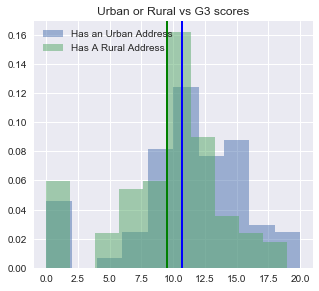

In [78]:
histvsdata(urban, 'Has an Urban Address', 
         rural, 'Has A Rural Address', 
         'Urban or Rural vs G3 scores',
        'G3')

Seems that living in the city has a positive effect on students studies.  What about family size?

In [79]:
Morethan3 = df[df['famsize']=='GT3'] #create a filtered df with only information on students with divorced parents
Morethan3.name = 'Morethan3'
Threeorless = df[df['famsize']=='LE3'] #create a filtered df with only information on students with remarried parents
Threeorless.name = 'Threeorless'
#checksignificance(Morethan3,Threeorless)

In [80]:
checkp(Morethan3,Threeorless)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Datasets are of different sizes ( Morethan3 281 and  Threeorless 114 )  we'll run a MAN WHITNEY statistic and pvalue test
G3 Ttest_indResult(statistic=-1.6942894182883583, pvalue=0.091554705624141253)


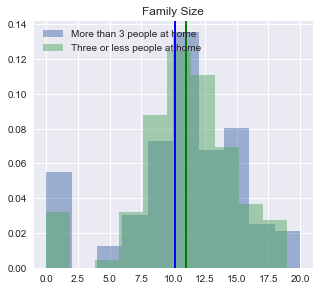

In [46]:
histvsdata(Morethan3, 'More than 3 people at home', 
         Threeorless, 'Three or less people at home', 
         'Family Size',
        'G3')

Larger families seem to also be more likely to score higher, but also more likely to outright fail the class.  Its possible that there is more interesting information about this in regards to what number child the scores are in reference to, oldest, youngest or middle.  But unfortunetly we don't have any information about that.

In [17]:
divorced = df[df['Pstatus']=='A'] #create a filtered df with only information on students with divorced parents
divorced.name = 'divorced'
married = df[df['Pstatus']=='T'] #create a filtered df with only information on students with remarried parents
married.name = 'married'

In [18]:
checkp(divorced,married)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Since the datasets are of different sizes ( divorced 41 and  married 354 )  we'll run a MAN WHITNEY statistic and pvalue test
G3 Ttest_indResult(statistic=1.2196750248412154, pvalue=0.22816469197603795)


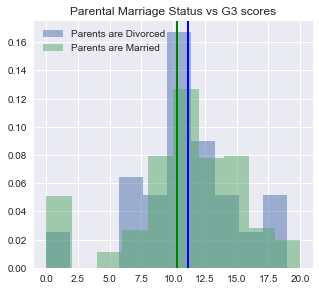

In [19]:
histvsdata(divorced, 'Parents are Divorced', 
         married, 'Parents are Married', 
         'Parental Marriage Status vs G3 scores',
        'G3')

It seems overall that parental marriage status doesn't affect students performance in any meaningful way.  However, it does seem that parental marriage status is linked to the education level of the Mother.  It's worth looking at how the employment status of the parents affects students performace.

In [20]:
stayathomemom = df[df['Mjob']=='at_home'] #create a dataframe of students where the mother is a stay at home mom
stayathomemom.name = 'stayathomemom'
notstayathomemom = df[df['Mjob']!='at_home'] #create a dataframe of students where the mother is a working mom
notstayathomemom.name = 'notstayathomemom'
#checksignificance(stayathomemom,notstayathomemom)  


In [21]:
checkp(stayathomemom,notstayathomemom)    #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Since the datasets are of different sizes ( stayathomemom 59 and  notstayathomemom 336 )  we'll run a MAN WHITNEY statistic and pvalue test
G3 Ttest_indResult(statistic=-2.2359103827134508, pvalue=0.028225000865082017)


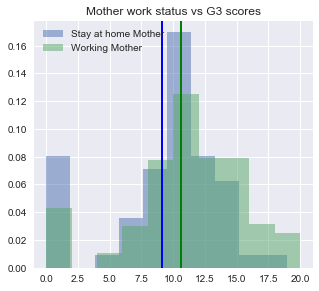

In [22]:
histvsdata(stayathomemom, 'Stay at home Mother', 
         notstayathomemom, 'Working Mother', 
         'Mother work status vs G3 scores',
          'G3')

Students with mothers who work seem to perform better in school than students with mothers who don't.  But what about the fathers.

In [23]:
stayathomedad = df[df['Fjob']=='at_home'] #create a dataframe of students where the mother is a stay at home mom
stayathomedad.name = 'stayathomedad'
notstayathomedad = df[df['Fjob']!='at_home'] #create a dataframe of students where the mother is a working mom
notstayathomedad.name = 'notstayathomedad'
#checksignificance(stayathomemom,notstayathomemom)  

In [24]:
checkp(stayathomedad,notstayathomedad)    #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Since the datasets are of different sizes ( stayathomedad 20 and  notstayathomedad 375 )  we'll run a MAN WHITNEY statistic and pvalue test
G3 Ttest_indResult(statistic=-0.23020617208984656, pvalue=0.82021265725021952)


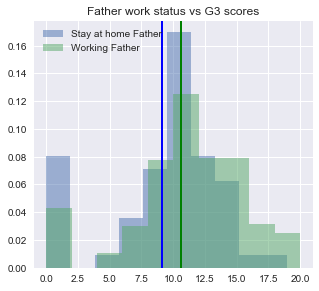

In [25]:
histvsdata(stayathomemom, 'Stay at home Father', 
         notstayathomemom, 'Working Father', 
         'Father work status vs G3 scores',
          'G3')

Unsurprisingly, students with fathers who work also fair better in school.  It's likely that the education levels of mothers and fathers also correspond to performance in school.  While student supplied data suggested family relations had little correlation to performance the nominal data suggests that the students with parents of higher education and both work are likely to do better in school.

But what about the life of the students.  The ordinal data didn't give much information.  As we saw the only correlation to performace supplied by the students ordinal data was the frequency that they go out with friends was negatively correlated to performance.  Lets take a look at some of the nominal data to see if we can expand on that.  Starting with students who are involved with after school activities, something often encouraged by parents for the sake of their children. 

In [26]:
aftrschlactive = df[df['activities']=='yes']  #create a dataframe where students have after school activities
aftrschlactive.name = 'aftrschlactive'
noaftrschlactive = df[df['activities']=='no'] #create a dataframe where students dont have after school activities
noaftrschlactive.name = 'noaftrschlactive'
#checksignificance(aftrschlactive,noaftrschlactive)

In [27]:
checkp(aftrschlactive,noaftrschlactive)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Since the datasets are of similar sizes ( aftrschlactive 201 and  noaftrschlactive 194 ) we'll run a STANDARD tstatistic and pvalue test
G3 Ttest_indResult(statistic=0.3194427846668576, pvalue=0.74956051299100235)


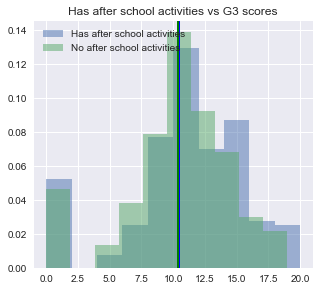

In [28]:
histvsdata(aftrschlactive, 'Has after school activities', 
         noaftrschlactive, 'No after school activities', 
         'Has after school activities vs G3 scores',
        'G3')

It seems that students engaged in afterschool activities peform better in school than those not in school.  Suggesting that while free time was surveyed to have no impact on scores, students who have their time filled and have less free time do better in school.  What about students who occupy themselves with romantic relationships.

In [29]:
romantic = df[df['romantic']=='yes']  #create a dataframe where students have romantic relationships
romantic.name = 'romantic'
noromantic = df[df['romantic']=='no'] #create a dataframe where students dont have romantic relationships
noromantic.name = 'noromantic'
#checksignificance(romantic,noromantic)

In [30]:
checkp(romantic,noromantic)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Since the datasets are of different sizes ( romantic 132 and  noromantic 263 )  we'll run a MAN WHITNEY statistic and pvalue test
G3 Ttest_indResult(statistic=-2.5122003751250026, pvalue=0.012655171343332709)


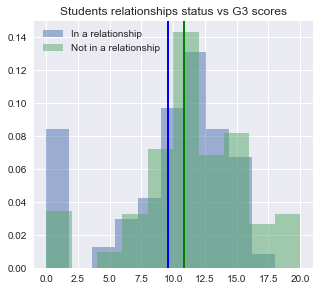

In [31]:
histvsdata(romantic, 'In a relationship', 
         noromantic, 'Not in a relationship', 
         'Students relationships status vs G3 scores',
        'G3')

Parents the world over will feel justified in not liking their childs boyfriend/girlfriend.  Not only are children in relationships less likely to do well in school, but the rate of failure in school for students with significant others is far higher than those without.

Another pastime of the young and restless is online social life.  While most Children have internet at home not all do.  So we have a chance to peer into the data to see how internet is affecting their live.  Are they wasting away on facebook?  Or is the internet a strong learning tool.

In [32]:
haveinternet = df[df['internet']=='yes'] #create a dataframe where students have internet at home
haveinternet.name = 'haveinternet'
nointernet = df[df['internet']=='no'] #create a dataframe where students dont have internet at home
nointernet.name = 'nointernet'
#checksignificance(haveinternet,nointernet)

In [33]:
checkp(haveinternet,nointernet)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Since the datasets are of different sizes ( haveinternet 329 and  nointernet 66 )  we'll run a MAN WHITNEY statistic and pvalue test
G3 Ttest_indResult(statistic=1.9894409453501107, pvalue=0.049552022160784567)


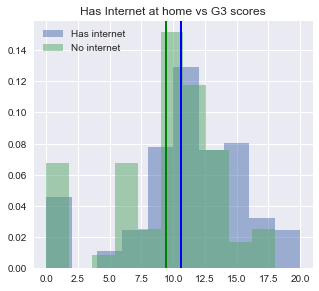

In [34]:
histvsdata(haveinternet, 'Has internet', 
         nointernet, 'No internet', 
         'Has Internet at home vs G3 scores',
        'G3')

Seems that the internet is infact a strong learning tool.  

The last piece of interesting nominal data we have is in regards to whether or not students want to attend a higher level of formal education following secondary school.

In [35]:
wantshigher = df[df['higher']=='yes']  #create a dataframe where students want to get higher education
wantshigher.name = 'wantshigher'
nohigherdesire = df[df['higher']=='no'] #create a dataframe where students dont want to get higher education
nohigherdesire.name = 'nohigherdesire'
#checksignificance(wantshigher,nohigherdesire)

In [36]:
checkp(wantshigher,nohigherdesire)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Since the datasets are of different sizes ( wantshigher 375 and  nohigherdesire 20 )  we'll run a MAN WHITNEY statistic and pvalue test
G3 Ttest_indResult(statistic=3.4473779245028155, pvalue=0.0024400339855819241)


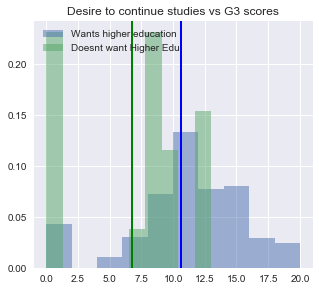

In [37]:
histvsdata(wantshigher, 'Wants higher education', 
         nohigherdesire, 'Doesnt want Higher Edu', 
         'Desire to continue studies vs G3 scores',
        'G3')

This is has been the strongest piece of data we have seen so far.

This is probably the strongest metric we have seen so far, students who want to continue going to school after secondary school are more likely to succeed than students who dont, which is common sense.  Students who want to do well will try harder, regardless of what their survey responses say the amount they drink or the amount of free time they have.

While the oridinal data we looked for correlations for in the beginning didn't have much significance for us the nominal data when looked at shows clear predictors for student performance.  It's possible that students don't know how to rate their own behaviors on a ordinal scale, or maybe they don't want to admit certain things about themselves on paper.  But there are indications that students who have less free time and have parents from a strong educational background, and more likely to push their children to study harder, are more likely to succeed in school.